In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA

In [3]:
# Load the Iris dataset
iris = load_iris()
data = iris.data
true_labels = iris.target

In [4]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

**PCA**

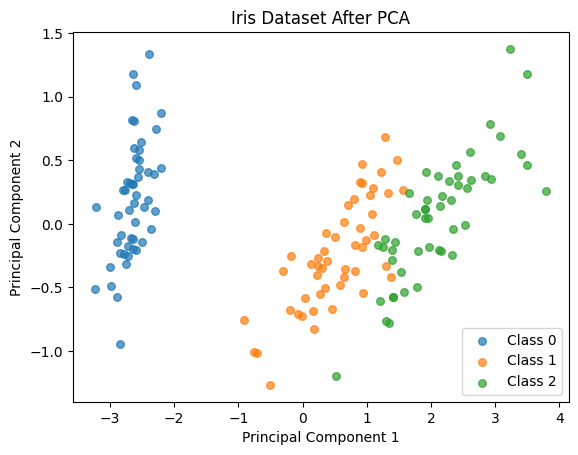

In [5]:
# Reduce dimensionality for better visualization (optional)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Visualize the original dataset with colors representing each class
plt.scatter(data_2d[true_labels == 0, 0], data_2d[true_labels == 0, 1], label='Class 0', s=30, alpha=0.7)
plt.scatter(data_2d[true_labels == 1, 0], data_2d[true_labels == 1, 1], label='Class 1', s=30, alpha=0.7)
plt.scatter(data_2d[true_labels == 2, 0], data_2d[true_labels == 2, 1], label='Class 2', s=30, alpha=0.7)

plt.title("Iris Dataset After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


**DBSCAN**

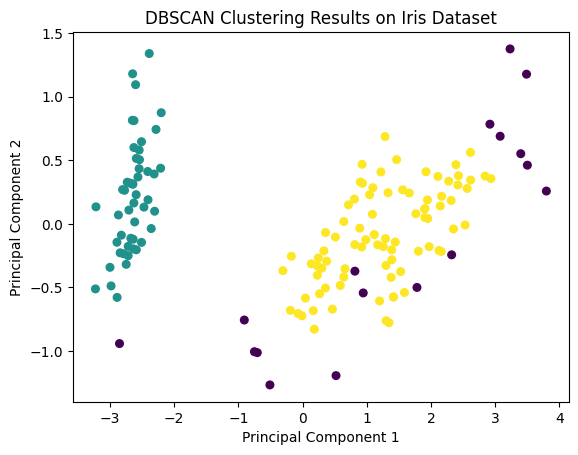

In [6]:

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
predicted_labels = dbscan.fit_predict(data)

# Visualize the clustering results
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=predicted_labels, cmap='viridis', s=30)
plt.title("DBSCAN Clustering Results on Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


**K-means**

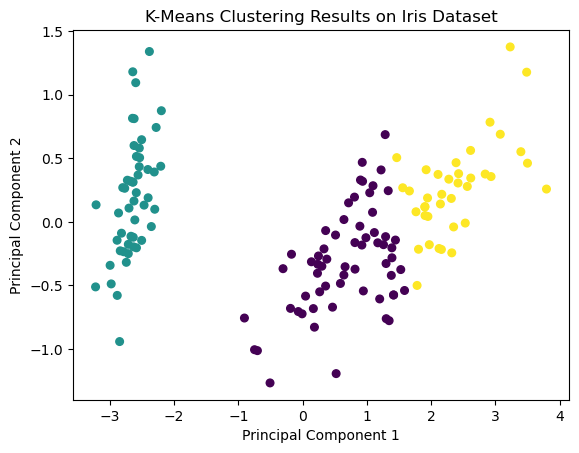

In [ ]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_predicted_labels = kmeans.fit_predict(data)

# Visualize k-means clustering results
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans_predicted_labels, cmap='viridis', s=30)
plt.title("K-Means Clustering Results on Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

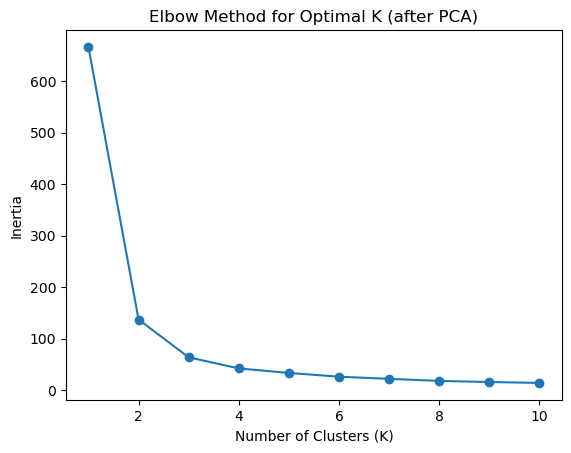

In [ ]:
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Apply the elbow method to find the optimal number of clusters (K) for k-means
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_2d)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K (after PCA)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

**Plot all the algorithems**

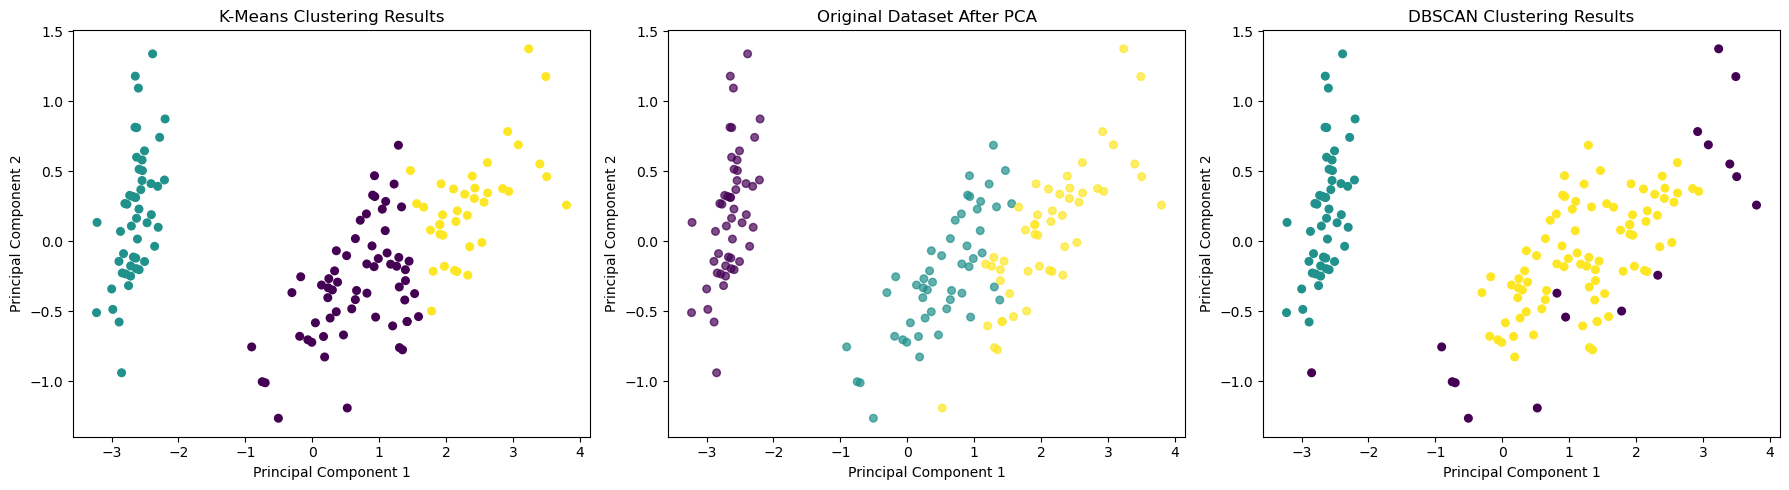

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Visualize k-means clustering results on the left subplot
axes[0].scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans_predicted_labels, cmap='viridis', s=30)
axes[0].set_title("K-Means Clustering Results")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")

# Visualize PCA results in the middle subplot
axes[1].scatter(data_2d[:, 0], data_2d[:, 1], c=true_labels, cmap='viridis', s=30, alpha=0.7)
axes[1].set_title("Original Dataset After PCA")
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")

# Visualize DBSCAN clustering results on the right subplot
axes[2].scatter(data_2d[:, 0], data_2d[:, 1], c=predicted_labels, cmap='viridis', s=30)
axes[2].set_title("DBSCAN Clustering Results")
axes[2].set_xlabel("Principal Component 1")
axes[2].set_ylabel("Principal Component 2")

# Adjust layout for better appearance
plt.tight_layout()
plt.show()
